In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib
import matplotlib.pyplot as plt # plotting
%matplotlib inline 
print("matplotlib version: {}". format(matplotlib.__version__))

import seaborn as sns
print("seaborn version: {}". format(sns.__version__))

import sklearn # machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))
from sklearn.preprocessing import StandardScaler

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

matplotlib version: 3.4.1
seaborn version: 0.11.1
scikit-learn version: 0.24.1
/kaggle/input/tabular-playground-series-may-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-may-2021/train.csv
/kaggle/input/tabular-playground-series-may-2021/test.csv


# About
This notebook is my EDA for the Tabular Playground Series May 2021. No modelling yet.

Let's look at training and testing data.

In [2]:
df_train = pd.read_csv('../input/tabular-playground-series-may-2021/train.csv')
df_test = pd.read_csv('../input/tabular-playground-series-may-2021/test.csv')
sample_submission = pd.read_csv('../input/tabular-playground-series-may-2021/sample_submission.csv') #the sample submission predicts everybody survived
df_all = df_train.append(df_test, ignore_index = True) # created because sometimes it is convenient to work on train and test set together

In [3]:
df_train.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,0,1,0,1,0,0,0,0,...,0,0,21,0,0,0,0,0,0,Class_2
1,1,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,2,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,13,2,0,Class_1
3,3,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,1,0,Class_4
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Class_2


In [4]:
df_test.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,100000,0,0,0,0,0,0,4,4,0,...,0,0,0,0,0,0,0,0,0,0
1,100001,0,0,1,0,0,0,2,0,7,...,3,0,1,0,0,0,1,0,2,1
2,100002,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,6,0
3,100003,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,6,9,14,3
4,100004,0,0,0,0,0,0,1,0,4,...,1,0,0,0,0,0,0,0,0,0


In [5]:
df_train.describe().transpose()\
        .drop("id")\
        .style.bar(subset=['mean','std'])\
        .background_gradient(subset=['max'])

,count,mean,std,min,25%,50%,75%,max
feature_0,100000.000000,0.257830,0.929033,0.000000,0.000000,0.000000,0.000000,10.000000
feature_1,100000.000000,0.431720,1.977862,0.000000,0.000000,0.000000,0.000000,31.000000
feature_2,100000.000000,0.114130,0.519584,0.000000,0.000000,0.000000,0.000000,6.000000
feature_3,100000.000000,0.590550,1.844558,0.000000,0.000000,0.000000,0.000000,26.000000
feature_4,100000.000000,0.599770,2.785531,0.000000,0.000000,0.000000,0.000000,38.000000
feature_5,100000.000000,0.160820,0.601149,0.000000,0.000000,0.000000,0.000000,10.000000
feature_6,100000.000000,0.731490,2.343465,0.000000,0.000000,0.000000,0.000000,27.000000
feature_7,100000.000000,1.228920,2.692732,0.000000,0.000000,0.000000,1.000000,31.000000
feature_8,100000.000000,0.903350,3.415258,0.000000,0.000000,0.000000,0.000000,39.000000
feature_9,100000.000000,0.940120,1.904172,0.000000,0.000000,0.000000,1.000000,17.000000


In [6]:
df_test.describe().transpose()\
        .drop("id")\
        .style.bar(subset=['mean','std'])\
        .background_gradient(subset=['max'])

,count,mean,std,min,25%,50%,75%,max
feature_0,50000.000000,0.254620,0.910607,0.000000,0.000000,0.000000,0.000000,10.000000
feature_1,50000.000000,0.443480,2.004536,0.000000,0.000000,0.000000,0.000000,31.000000
feature_2,50000.000000,0.116720,0.524807,0.000000,0.000000,0.000000,0.000000,6.000000
feature_3,50000.000000,0.584440,1.814083,0.000000,0.000000,0.000000,0.000000,25.000000
feature_4,50000.000000,0.612640,2.819580,0.000000,0.000000,0.000000,0.000000,38.000000
feature_5,50000.000000,0.161500,0.605760,0.000000,0.000000,0.000000,0.000000,9.000000
feature_6,50000.000000,0.746000,2.352495,0.000000,0.000000,0.000000,0.000000,25.000000
feature_7,50000.000000,1.238040,2.728055,0.000000,0.000000,0.000000,1.000000,29.000000
feature_8,50000.000000,0.886440,3.364154,0.000000,0.000000,0.000000,0.000000,35.000000
feature_9,50000.000000,0.941920,1.913358,0.000000,0.000000,0.000000,1.000000,16.000000


In [7]:
# number of rows with any values below zero
display(df_train[(df_train.drop(["target"],axis=1) < 0).any(1)].shape)
df_test[(df_test < 0).any(1)].shape

(227, 52)

(109, 51)

In [8]:
# check the target variable
df_train.target.value_counts()

Class_2    57497
Class_3    21420
Class_4    12593
Class_1     8490
Name: target, dtype: int64

What do we have here? **Training data** with 50 anonymized numerical features and 100000 training examples, identified with an id. There are no missing values. Data type is integer. 

The **target** is categorical with four values. Data type object -> str. Class_2 is dominant with more than half of the examples. Class_1 has the fewest examples (less than 10%). We need to take care about this when modelling. 

Most features have a minimum values of 0. Features 19, 30, 31, 32, 35, 38, 39 and 42 have negative values. There are in total 227 training examples with one or more negative values, which is 0.23%.  The maximum value for any feature is 66.

The features differ in terms of their mean and standard deviation. So depending on my choice of model later on, mean normalization will be necessary. 

The **test data** consistis of 50000 examples. There are in total 109 training examples with negative values, which is 0,22%. Features 14, 19, 30, 31, 32, 38 and 39 have negative values. This is different from the training set!

Note to myself: the percentage of rows with negative values is very low. Check model performance with and without the negative rows.

Let's look at the **distributions**.

In [9]:
109*2

218

In [10]:
# code for mean normalization. all features are centered around 0 and have variance in the same order
#scaler = StandardScaler() 
#df_temp = pd.DataFrame(data=scaler.fit_transform(df_train.drop(["target"],axis=1)),columns=df_train.drop(["target"],axis=1).columns)
#df_temp.describe().transpose()

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


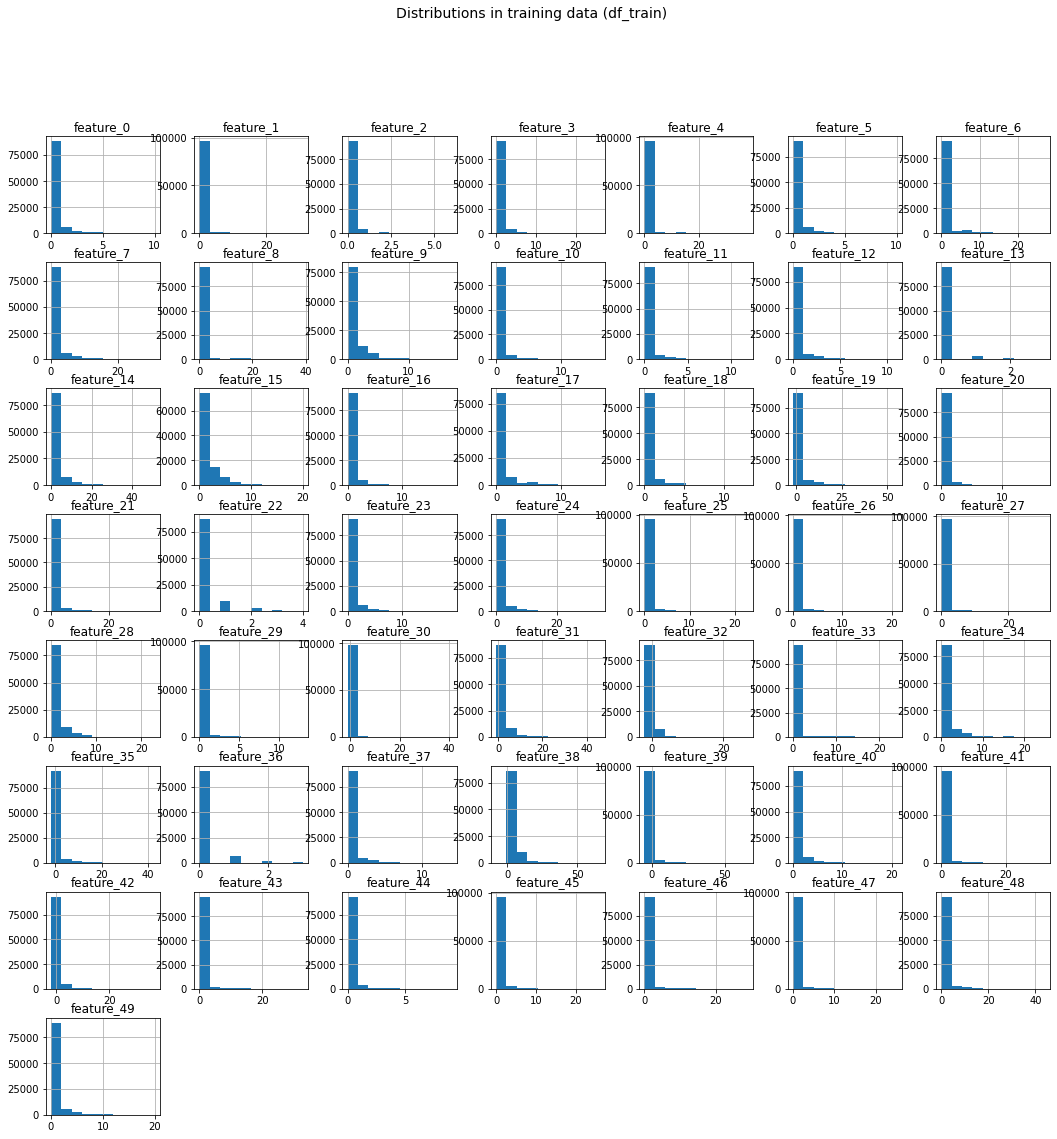

In [11]:
fsize = (18,18)
df_train.drop(["id","target"],axis=1).hist(figsize=fsize)
plt.suptitle("Distributions in training data (df_train)", fontsize=14)
plt.show()

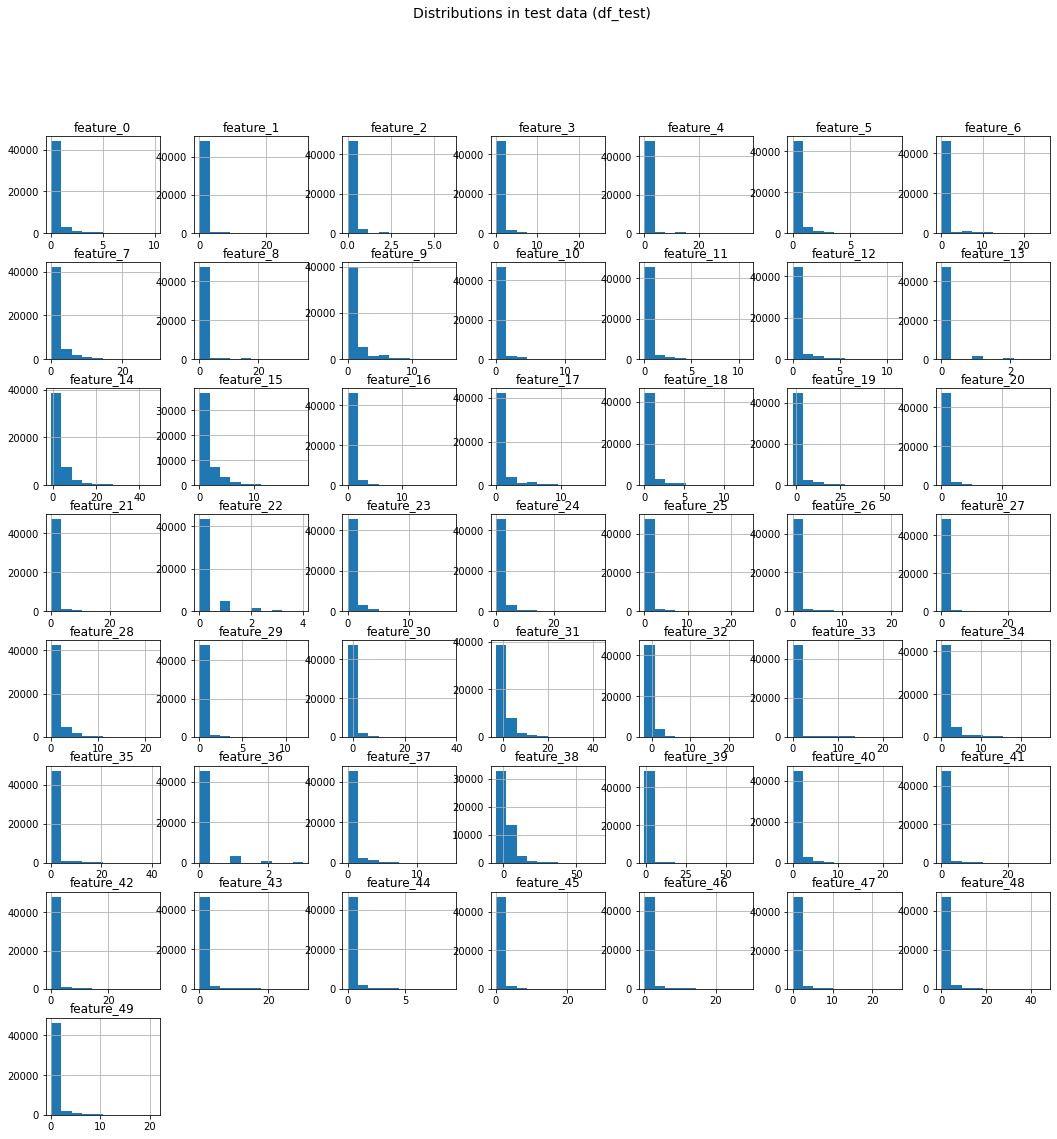

In [12]:
fsize = (18,18)
df_test.drop(["id"],axis=1).hist(figsize=fsize)
plt.suptitle("Distributions in test data (df_test)", fontsize=14)
plt.show()

We can see here that all distributions are right skewed. For feature_38 there is a visible difference in distribution in train and test data. 

feature_8


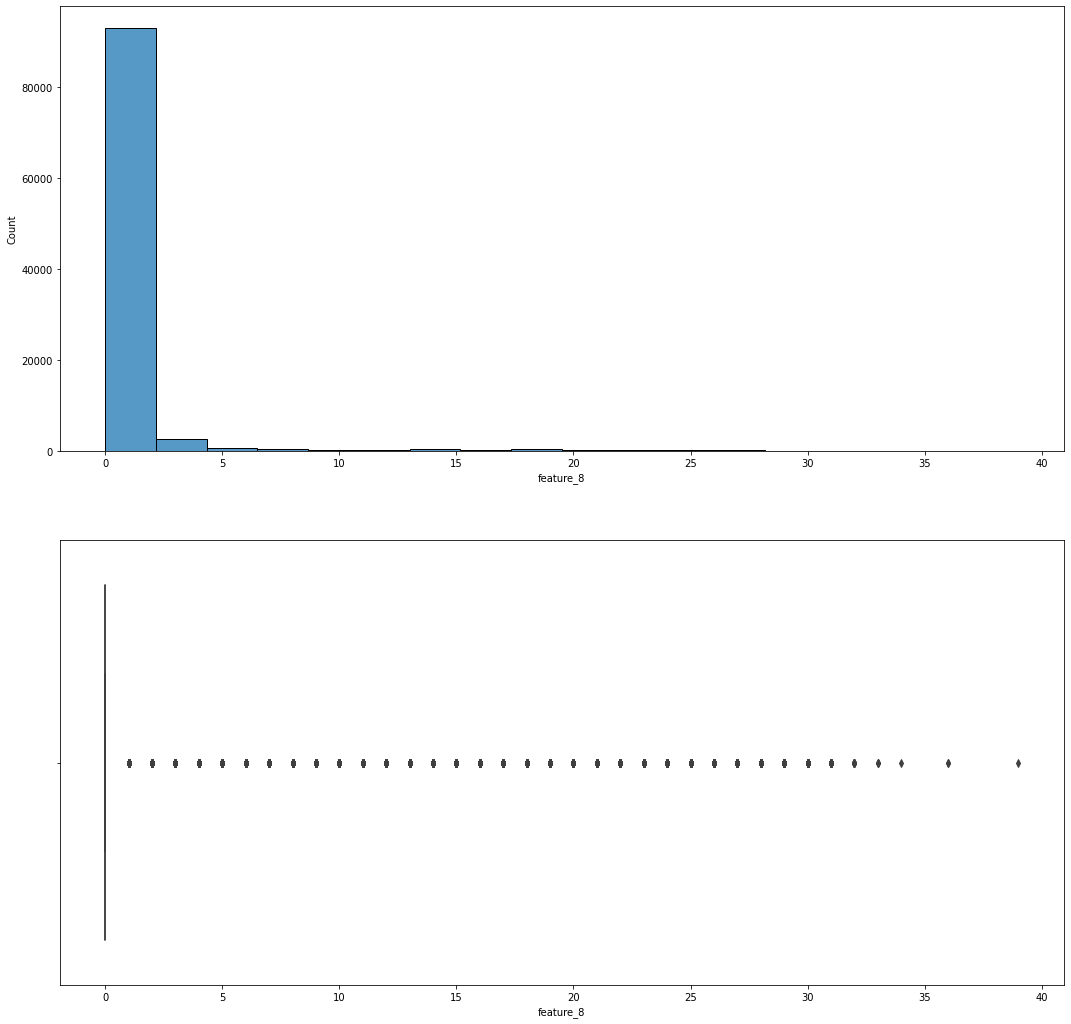

0     80046
1      9156
2      3905
3      1840
4       748
5       332
6       300
7       282
8       211
18      206
19      194
15      192
14      189
20      189
16      188
13      175
17      172
12      171
21      163
9       159
23      154
22      147
24      145
11      139
10      123
25      116
27       94
26       93
28       60
29       38
30       31
31       25
32       10
33        3
36        2
34        1
39        1
Name: feature_8, dtype: int64


In [13]:
# choose feature for a closer look
current_feature = "feature_8"
current_df = df_train
print(current_feature)

fig = plt.figure(figsize=fsize) # create figure
fsize = (16,12)
ax0 = fig.add_subplot(2, 1, 1) # add subplot 1 (2 rows, 1columns, first plot)
ax1 = fig.add_subplot(2, 1, 2)
#current_df[current_feature].hist(figsize=fsize, ax=ax0)
sns.histplot(x=current_feature, data=current_df, ax=ax0) # just an alternative with sns instead of plt
sns.boxplot(x=current_feature, data=current_df, ax=ax1)
plt.show()

print(current_df[current_feature].value_counts())

In [14]:
# let's check if there are as many unique feature values as the range of values
df_features = df_train.drop(["id","target"],axis=1) # use df_all, df_test here depending on what you want to see

feature_range = df_features.max() - df_features.min()
no_unique_values = df_features.nunique()

pd.DataFrame(data={"feature_range": feature_range, "no_unique_values": no_unique_values})

,feature_range,no_unique_values
feature_0,10,11
feature_1,31,31
feature_2,6,7
feature_3,26,26
feature_4,38,38
feature_5,10,11
feature_6,27,28
feature_7,31,32
feature_8,39,37
feature_9,17,18


Observations:

- There are no binary features

- There are features with few unique values (low cardinality), and with many unique values (high cardinality). Is it safe to guess that features with "few" unique values are categorical features and those with many are continous features???

- When looking at the training and testing data to check if the feature values are "continous", I found this to be the case for most features. However there are features where the values go like ...27, 28, 29, 31 (feature_1) or 31, 32, 33, 34, 36, 39 (feature_8). This can be best seen using the sns boxplot.

 In some cases the unused feature values are present in the test set (like for feature_1), in other cases only partly (like for feature_8). 

 I'm not sure what to make of this observation. I wonder if a feature like feature_8 is a real continous feature. Because, if it was a categorical, there should not be any missing labels...?

- About the features with negative values: Either they are categorical features that have been label encoded "by hand" to produce the negative values or they are continous features. However I still could not come up with a feature of an eCommerce product that has multiple negative values. I considered, that a negative value just means "missing data". But again, this does not explain multiple negative values for a feature. 

Thanks to OmarVivas who informed us about **duplicates** in this data set. Let's check.

There are really 4 duplicates in the training set with different target. I will remove this rows before training.

There are further 6 rows from training set, that are also present in the test set. Remember to check those rows in the prediction. 

In [15]:
# look only in training data
display(df_train[df_train.drop(columns=["id","target"]).duplicated(keep="first")])
display(df_train[df_train.drop(columns=["id","target"]).duplicated(keep="last")])
# 44423 - 13230, Class_4 vs Class_2
# 73244 - 25648, Class_2 vs Class_4
# 80571 - 44248, Class_4 vs Class_2
# 89009 - 87104, Class_1 vs Class_3

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
44423,44423,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_4
73244,73244,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_2
80571,80571,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_4
89009,89009,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1


,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
13230,13230,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_2
25648,25648,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_4
44248,44248,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_2
87104,87104,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_3


In [16]:
# look in combined data, keep=False shows both duplicated rows in the result
duplicates = df_all[df_all.drop(columns=["id","target"]).duplicated(keep=False)].drop([13230,25648,44248,87104,44423,73244,80571,89009],axis=0)
#display(df_all[df_all.drop(columns=["id","target"]).duplicated(keep="first")])
#display(df_all[df_all.drop(columns=["id","target"]).duplicated(keep="last")])
duplicates

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
23272,23272,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_4
31717,31717,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_2
36458,36458,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Class_3
62190,62190,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_2
63143,63143,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_4
81438,81438,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_4
101173,101173,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
114770,114770,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
120754,120754,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
132016,132016,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [17]:
# class_3 36458 -> 143136
# class_2 31717 -> 132016
# class_4 23272 -> 143298
# Class_2 62190 -> 114770
# Class_4 81438 -> 120754
# Class_4 63143 -> 101173

Baseline submission:

In [18]:
# predict everything Class_2
sample_submission.loc[36458]["Class_1"]=0
sample_submission.loc[36458]["Class_2"]=0
sample_submission.loc[36458]["Class_3"]=1
sample_submission.loc[36458]["Class_4"]=0
sample_submission.to_csv('submission_1.csv', index=False)
#-> public leaderboard score: 14.62209

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [19]:
df_train.target.value_counts(normalize=True)

Class_2    0.57497
Class_3    0.21420
Class_4    0.12593
Class_1    0.08490
Name: target, dtype: float64

In [20]:
# predict like train set probabilites
sample_submission.Class_1=0.08
sample_submission.Class_2=0.57
sample_submission.Class_3=0.21
sample_submission.Class_4=0.12
sample_submission.to_csv('submission_2.csv', index=False)
#-> public leaderboard score: 1.11369